<a href="https://colab.research.google.com/github/spdin/time-series-prediction-lstm-pytorch/blob/master/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q-Netowrk
- Yongyang Liu

pip install gym

pip install highway-env



## DQN 

In [1]:
import numpy as np
import gym
import highway_env
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable
from Utils.DQN_Agent import Agent

PATH = "Trained_model/DQN.pth"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

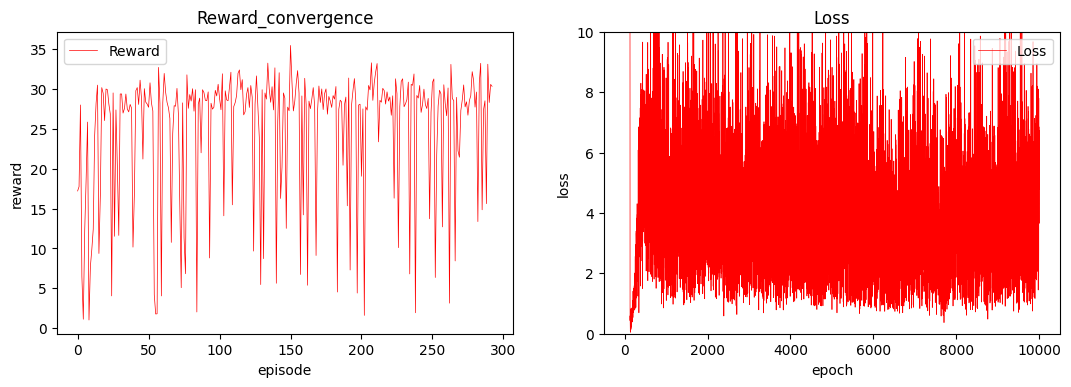

In [2]:
env = gym.make("highway-v0")
input_shape = env.observation_space.shape
num_actions = env.action_space.n

agent = Agent(
        input_shape, 
        num_actions,
        device,
        PATH,
        gamma = 0.95,
        learning_rate = 0.001,
        replay_size = 10000,
        batch_size = 128
        )

state_train  = Variable(torch.empty(1, 1, input_shape[0], input_shape[1])).to(device)
num_frames = 10000
losses = []
all_rewards = []
episode_reward = 0

state = env.reset().reshape(1,input_shape[0],input_shape[1])
for frame in range(num_frames):

    state_train[0] = Variable(torch.Tensor(np.array(state)))
    action = agent.get_action(state_train, frame)
    next_state, reward, done, info = env.step(action)
    next_state = next_state.reshape(1,input_shape[0],input_shape[1])

    agent.append_buffer(state, action, reward, next_state, done)

    episode_reward += reward
    state = next_state.copy()

    loss = agent.compute_loss()
    losses.append(loss)

    if frame % 10 == 0:
        agent.update_target_model()

        #print("epoch: %d/%d, loss: %1.8f" % (frame, num_frames, loss ))
    env.render()
     
    if done:
        all_rewards.append(episode_reward) 
        episode_reward = 0
        #env.reset()
        state = env.reset().reshape(1,input_shape[0],input_shape[1])
    
plt.figure(dpi=100, figsize=[20, 4])
plt.subplot(1, 3, 1)
plt.plot(all_rewards, c='r', linewidth=0.5, label = 'Reward')
plt.gca().set_title('Reward_convergence')
plt.xlabel('episode')
plt.ylabel('reward')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(losses, c='r', linewidth=0.5, label = 'Loss')
plt.gca().set_title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.ylim(0, 10)
plt.show()
env.close()

## Double DQN 

In [3]:
import numpy as np
import gym
import highway_env
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable

from Utils.Double_DQN_Agent import Agent

PATH = "Trained_model/Double_DQN.pth"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

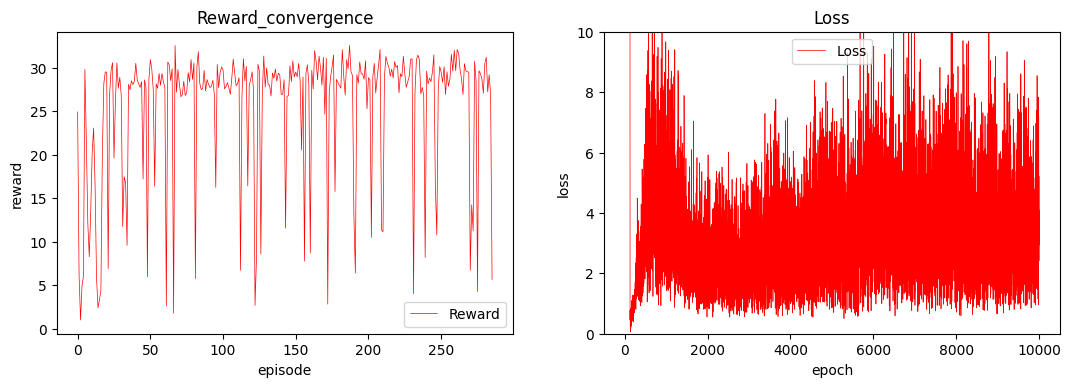

In [4]:
env = gym.make("highway-v0")
input_shape = env.observation_space.shape
num_actions = env.action_space.n

agent = Agent(
        input_shape, 
        num_actions,
        device,
        PATH,
        gamma = 0.95,
        learning_rate = 0.001,
        replay_size = 10000,
        batch_size = 128
        )

state_train  = Variable(torch.empty(1, 1, input_shape[0], input_shape[1])).to(device)
num_frames = 10000
losses = []
all_rewards = []
episode_reward = 0

state = env.reset().reshape(1,input_shape[0],input_shape[1])
for frame in range(num_frames):

    state_train[0] = Variable(torch.Tensor(np.array(state)))
    action = agent.get_action(state_train, frame)
    next_state, reward, done, info = env.step(action)
    next_state = next_state.reshape(1,input_shape[0],input_shape[1])

    agent.append_buffer(state, action, reward, next_state, done)

    episode_reward += reward
    state = next_state.copy()

    loss = agent.compute_loss()
    losses.append(loss)

    if frame % 10 == 0:
        agent.update_target_model()

        #print("epoch: %d/%d, loss: %1.8f" % (frame, num_frames, loss ))
    env.render()
     
    if done:
        all_rewards.append(episode_reward) 
        episode_reward = 0
        #env.reset()
        state = env.reset().reshape(1,input_shape[0],input_shape[1])
    
plt.figure(dpi=100, figsize=[20, 4])
plt.subplot(1, 3, 1)
plt.plot(all_rewards, c='r', linewidth=0.5, label = 'Reward')
plt.gca().set_title('Reward_convergence')
plt.xlabel('episode')
plt.ylabel('reward')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(losses, c='r', linewidth=0.5, label = 'Loss')
plt.gca().set_title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.ylim(0, 10)
plt.show()
env.close()

## Dueling DQN 

In [5]:
import numpy as np
import gym
import highway_env
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable

from Utils.Dueling_DQN_Agent import Agent

PATH = "Trained_model/Dueling_DQN.pth"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

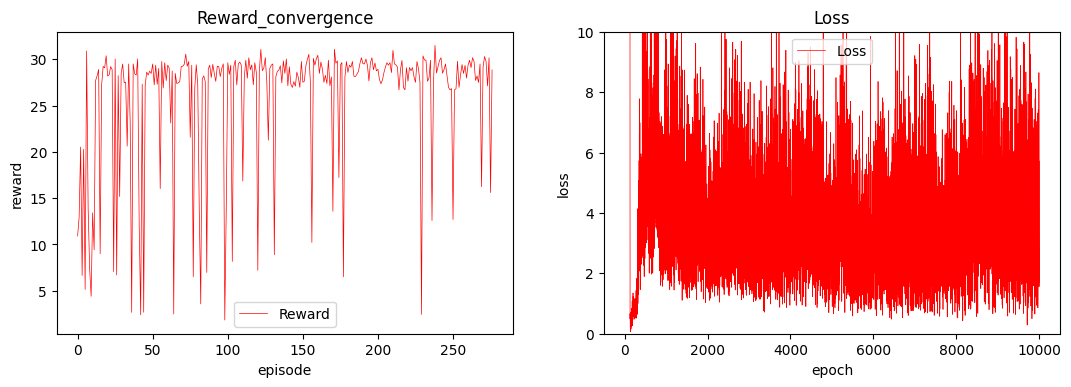

In [6]:
env = gym.make("highway-v0")
input_shape = env.observation_space.shape
num_actions = env.action_space.n

agent = Agent(
        input_shape, 
        num_actions,
        device,
        PATH,
        gamma = 0.95,
        learning_rate = 0.001,
        replay_size = 10000,
        batch_size = 128
        )

state_train  = Variable(torch.empty(1, 1, input_shape[0], input_shape[1])).to(device)
num_frames = 10000
losses = []
all_rewards = []
episode_reward = 0

state = env.reset().reshape(1,input_shape[0],input_shape[1])
for frame in range(num_frames):

    state_train[0] = Variable(torch.Tensor(np.array(state)))
    action = agent.get_action(state_train, frame)
    next_state, reward, done, info = env.step(action)
    next_state = next_state.reshape(1,input_shape[0],input_shape[1])

    agent.append_buffer(state, action, reward, next_state, done)

    episode_reward += reward
    state = next_state.copy()

    loss = agent.compute_loss()
    losses.append(loss)

    if frame % 10 == 0:
        agent.update_target_model()

        #print("epoch: %d/%d, loss: %1.8f" % (frame, num_frames, loss ))
    env.render()
     
    if done:
        all_rewards.append(episode_reward) 
        episode_reward = 0
        #env.reset()
        state = env.reset().reshape(1,input_shape[0],input_shape[1])
    
plt.figure(dpi=100, figsize=[20, 4])
plt.subplot(1, 3, 1)
plt.plot(all_rewards, c='r', linewidth=0.5, label = 'Reward')
plt.gca().set_title('Reward_convergence')
plt.xlabel('episode')
plt.ylabel('reward')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(losses, c='r', linewidth=0.5, label = 'Loss')
plt.gca().set_title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.ylim(0, 10)
plt.show()
env.close()

## Prioritized DQN 

In [7]:
import numpy as np
import gym
import highway_env
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable

from Utils.Prioritized_DQN_Agent import Agent

PATH = "Trained_model/Prioritized_DQN.pth"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

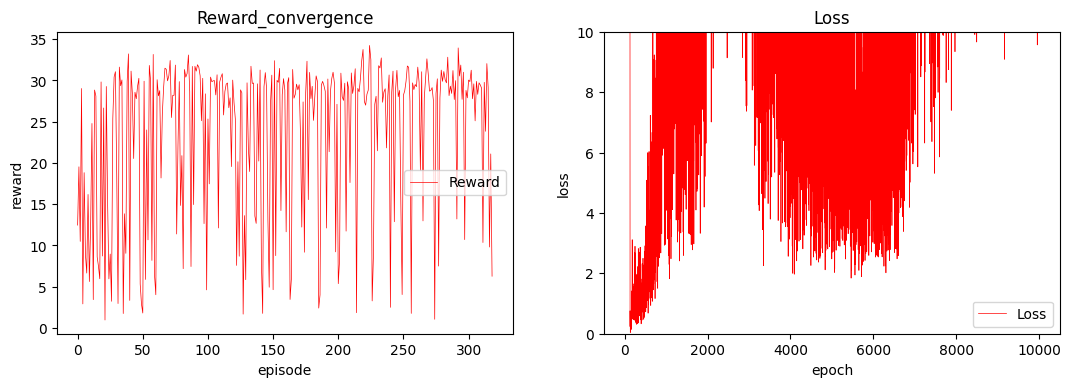

In [8]:
env = gym.make("highway-v0")
input_shape = env.observation_space.shape
num_actions = env.action_space.n

agent = Agent(
        input_shape, 
        num_actions,
        device,
        PATH,
        gamma = 0.95,
        learning_rate = 0.001,
        replay_size = 10000,
        batch_size = 128
        )

state_train  = Variable(torch.empty(1, 1, input_shape[0], input_shape[1])).to(device)
num_frames = 10000
losses = []
all_rewards = []
episode_reward = 0

state = env.reset().reshape(1,input_shape[0],input_shape[1])
for frame in range(num_frames):

    state_train[0] = Variable(torch.Tensor(np.array(state)))
    action = agent.get_action(state_train, frame)
    next_state, reward, done, info = env.step(action)
    next_state = next_state.reshape(1,input_shape[0],input_shape[1])

    agent.append_buffer(state, action, reward, next_state, done)

    episode_reward += reward
    state = next_state.copy()

    loss = agent.compute_loss()
    losses.append(loss)

    if frame % 10 == 0:
        agent.update_target_model()

        #print("epoch: %d/%d, loss: %1.8f" % (frame, num_frames, loss ))
    env.render()
     
    if done:
        all_rewards.append(episode_reward) 
        episode_reward = 0
        #env.reset()
        state = env.reset().reshape(1,input_shape[0],input_shape[1])
    
plt.figure(dpi=100, figsize=[20, 4])
plt.subplot(1, 3, 1)
plt.plot(all_rewards, c='r', linewidth=0.5, label = 'Reward')
plt.gca().set_title('Reward_convergence')
plt.xlabel('episode')
plt.ylabel('reward')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(losses, c='r', linewidth=0.5, label = 'Loss')
plt.gca().set_title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.ylim(0, 10)
plt.show()
env.close()

## Rainbow DQN 

In [9]:
import numpy as np
import gym
import highway_env
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable

from Utils.Rainbow_DQN_Agent import Agent

PATH = "Trained_model/Rainbow_DQN.pth"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

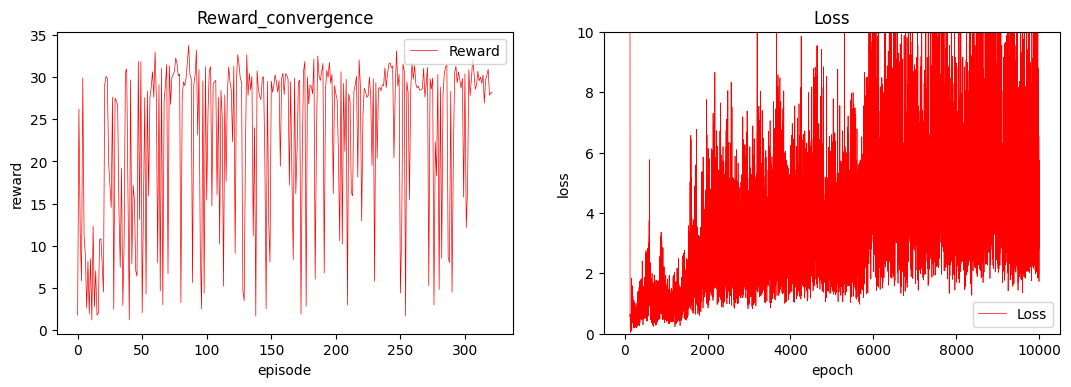

In [10]:
env = gym.make("highway-v0")
input_shape = env.observation_space.shape
num_actions = env.action_space.n

agent = Agent(
        input_shape, 
        num_actions,
        device,
        PATH,
        gamma = 0.95,
        learning_rate = 0.001,
        replay_size = 10000,
        batch_size = 128
        )

state_train  = Variable(torch.empty(1, 1, input_shape[0], input_shape[1])).to(device)
num_frames = 10000
losses = []
all_rewards = []
episode_reward = 0

state = env.reset().reshape(1,input_shape[0],input_shape[1])
for frame in range(num_frames):

    state_train[0] = Variable(torch.Tensor(np.array(state)))
    action = agent.get_action(state_train, frame)
    next_state, reward, done, info = env.step(action)
    next_state = next_state.reshape(1,input_shape[0],input_shape[1])

    agent.append_buffer(state, action, reward, next_state, done)

    episode_reward += reward
    state = next_state.copy()

    loss = agent.compute_loss()
    losses.append(loss)

    if frame % 10 == 0:
        agent.update_target_model()

        #print("epoch: %d/%d, loss: %1.8f" % (frame, num_frames, loss ))
    env.render()
     
    if done:
        all_rewards.append(episode_reward) 
        episode_reward = 0
        #env.reset()
        state = env.reset().reshape(1,input_shape[0],input_shape[1])
    
plt.figure(dpi=100, figsize=[20, 4])
plt.subplot(1, 3, 1)
plt.plot(all_rewards, c='r', linewidth=0.5, label = 'Reward')
plt.gca().set_title('Reward_convergence')
plt.xlabel('episode')
plt.ylabel('reward')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(losses, c='r', linewidth=0.5, label = 'Loss')
plt.gca().set_title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.ylim(0, 10)
plt.show()
env.close()